# Prueba de evaluación 2

Realizado por Araceli Macía Barrado

## Parte 2

En esta segunda parte trabajaremos con información en XML. 

Concretamente, el gobierno británico nos ofrece datasets sobre eventos de tráfico:

https://data.gov.uk/dataset/live-traffic-information-from-the-highways-agency-road-network


Trabajaremos con los “Unplanned Events” que se proporcionan en un formato XML. Se puede
descargar de esta URL:
http://hatrafficinfo.dft.gov.uk/feeds/datex/England/UnplannedEvent/content.xml

Concretamente, contiene un conjunto de situaciones (“situation”) y dentro de la descripción
de las situaciones, nos interesa el impacto (“impact”).

Investiga el impacto de los eventos no planificados en las variables que aporten algo de
información. 

Por ejemplo, la variable “capacityRemaining” indica la capacidad de la vía que
la situación dejó sin afectar, y en ocasiones indica obstrucción total (valor 0.0) pero en otros
casos sólo parcial. 

Estudia descriptivamente al menos 3 de las variables, sean numéricas o
categóricas, dentro de las que describen el impacto solamente.

In [1]:
#Recupero el fichero con la informacion.

from urllib import urlretrieve
link = 'http://hatrafficinfo.dft.gov.uk/feeds/datex/England/UnplannedEvent/content.xml'
urlretrieve(link, "UnplannedEvent.xml")  


#cargando datos en memoria.
from lxml import objectify #biblioteca lxml..API objectify.
parsed = objectify.parse('UnplannedEvent.xml') #analisis sintactico del objeto,
root = parsed.getroot() #cogemos la raiz del arbol. Nodo que contiene al resto.

print "root.tag", root.tag
print root.attrib #atributos no tiene. Si dentro del tag hubiera algo definido.
print "counchildren", root.countchildren() 


            

root.tag {http://datex2.eu/schema/1_0/1_0}d2LogicalModel
{'modelBaseVersion': '1.0'}
counchildren 2


In [2]:
#Recorremos el fichero xml para tratar los datos.
capacityRemaining=[] #capacidad de circular por esa via.
numberOfLanesRestricted=[]  #numero de vias restringidas
numberOfOperationalLanes =[] #numero de vias que esta operativas
originalNumberOfLanes=[] #numero total de vias de la calle
trafficRestrictionType=[] #tipo de restriccion
impactOnTraffic=[]

for rowPrin in root.payloadPublication:
    for rowSituacion in rowPrin.situation: #root. de la lista de todos los elementos situation que esta dentro de la raiz.
        for rowSitRecord in rowSituacion.situationRecord:
            for rowImpac in rowSitRecord.impact:                   
                capacityRemaining.append(rowImpac.impactDetails.capacityRemaining.text)
                numberOfLanesRestricted.append(rowImpac.impactDetails.numberOfLanesRestricted.text)
                numberOfOperationalLanes.append(rowImpac.impactDetails.numberOfOperationalLanes.text)
                originalNumberOfLanes.append(rowImpac.impactDetails.originalNumberOfLanes.text)
                trafficRestrictionType.append(rowImpac.impactDetails.trafficRestrictionType.text) 
                impactOnTraffic.append(rowImpac.impactOnTraffic.text)            
                
                
                
                        

In [3]:
len(capacityRemaining)

6

In [4]:
import pandas as pd
data = pd.DataFrame()
data['capacity'] = capacityRemaining
data['restricted'] = numberOfLanesRestricted
data['operational'] = numberOfOperationalLanes
data['original'] = originalNumberOfLanes
data['tipo'] = trafficRestrictionType
data['impacto'] = impactOnTraffic


In [5]:
data

,capacity,restricted,operational,original,tipo,impacto
0,75.0,1,3,4,carriagewayPartiallyObstructed,heavy
1,0.0,2,0,2,carriagewayBlocked,impossible
2,0.0,1,0,1,carriagewayBlocked,impossible
3,0.0,1,0,1,carriagewayBlocked,impossible
4,0.0,1,0,1,carriagewayBlocked,impossible
5,33.0,2,1,3,carriagewayPartiallyObstructed,freeFlow


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
capacity       6 non-null object
restricted     6 non-null object
operational    6 non-null object
original       6 non-null object
tipo           6 non-null object
impacto        6 non-null object
dtypes: object(6)
memory usage: 360.0+ bytes


Tengo que hacer una conversion de tipos.

In [7]:
#convierto los datos de las columnas.
data['capacity']=data['capacity'].astype(float)
data['restricted']=data['restricted'].astype(int)
data['operational']=data['operational'].astype(int)
data['original']=data['original'].astype(int)
data['tipo']=data['tipo'].astype(str)
data['impacto']=data['impacto'].astype(str)



data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
capacity       6 non-null float64
restricted     6 non-null int64
operational    6 non-null int64
original       6 non-null int64
tipo           6 non-null object
impacto        6 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 360.0+ bytes


In [8]:
data

,capacity,restricted,operational,original,tipo,impacto
0,75.0,1,3,4,carriagewayPartiallyObstructed,heavy
1,0.0,2,0,2,carriagewayBlocked,impossible
2,0.0,1,0,1,carriagewayBlocked,impossible
3,0.0,1,0,1,carriagewayBlocked,impossible
4,0.0,1,0,1,carriagewayBlocked,impossible
5,33.0,2,1,3,carriagewayPartiallyObstructed,freeFlow


Bueno, pues analizando los datos, a simple vista, el valor de capacity es el numero de carriles operacionales dividido entre el total de carriles originales. Este dato nos da la medida de cual es la capacidad de la calle. 
De acuerdo a este dato, se identifica el tipo de Situacion ( solo hay 2) y el impacto que tiene para el trafico.

Los datos tipo e impacto son valores categoricas.



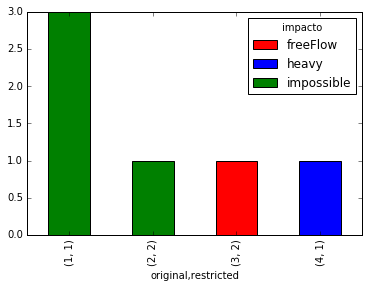

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

graf = pd.crosstab([data.original, data.restricted], data.impacto)
graf.plot(kind='bar', stacked=True, color=['red','blue','green'], grid=False)




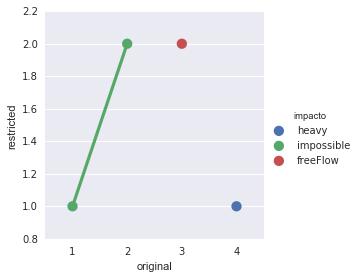

In [10]:
import seaborn as sns  #se importa como sns. 

sns.factorplot('original','restricted',hue='impacto',data=data)


Con la cantidad de datos existentes, poco se puede ver en los graficos. 
Cuando el numero de carriles originales es igual al numero de carriles restringidos, el trafico se califica como imposible. 
